In [44]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from math import sqrt
# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()
N=8000

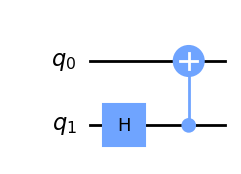

In [45]:
## Creating a gate that creats a bell state
# Create a quantum circuit with two qubits
bell_circuit = QuantumCircuit(2)


bell_circuit.h(1) # Apply a Hadamard gate to the first qubit (creates a Bell state)
bell_circuit.cx(1, 0)  # Apply a CNOT gate to create an entangled state

bc=bell_circuit.to_gate(label="Bell Circuit")
bell_circuit.draw()

In [46]:
## The unitary that changes the basis from (X+Z)/sqrt(2) to standard basis
from qiskit.quantum_info.operators import Operator
from qiskit.extensions import UnitaryGate
U0=UnitaryGate(
    Operator([[(1-sqrt(2))/sqrt(4-2*sqrt(2)),(1+sqrt(2))/sqrt(4+2*sqrt(2))],
              [1/sqrt(4-2*sqrt(2)),1/sqrt(4+2*sqrt(2))]]), label="U0")
U1=UnitaryGate(
    Operator([[(-1-sqrt(2))/sqrt(4+2*sqrt(2)),(-1+sqrt(2))/sqrt(4-2*sqrt(2))],
              [1/sqrt(4+2*sqrt(2)),1/sqrt(4-2*sqrt(2))]]), label="U1")
## The unitary that changes the basis from (X-Z)/sqrt(2) to standard basis

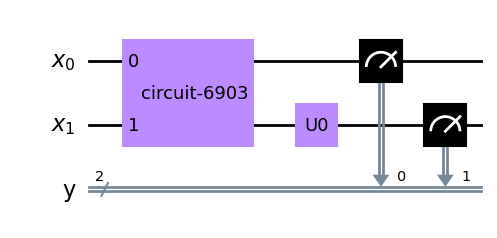

In [47]:
## To calculate P(ab/xy=00) we measure Alice's qubit on Z basis and Bob's qubit on (X+Z)/sqrt(2) basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(2, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc = QuantumCircuit(q,c)
qc.append(bell_circuit,[q[0], q[1]])

qc.append(U0,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc.measure(q, c)
qc.draw()



In [48]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel
from qiskit.providers.fake_provider import FakeVigo

# Build noise model from backend properties
backend = FakeVigo()
noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Perform a noise simulation
backend = AerSimulator(noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates)
transpiled_circuit = transpile(qc, backend)
# Specify the number of shots for each run of the circuit
num_shots =  N  # You can change this number based on your needs

# Perform multiple runs of the transpiled circuit with noise
simulator = AerSimulator(noise_model=noise_model, coupling_map=coupling_map, basis_gates=basis_gates)
job = execute(transpiled_circuit, simulator, shots=num_shots)

# Retrieve the results
result = job.result()
counts = result.get_counts(transpiled_circuit)

total_shots = sum(counts.values())  # Calculate the total number of shots
# Initialize a dictionary to store the probabilities
P00 = {}

# Calculate the probability for each outcome
for outcome, count in counts.items():
    probability = count / total_shots
    P00[outcome] = probability
P00
## "P(-1-1/00)","P(-11/00)","P(1-1/00)","P(11/00)"

{'11': 0.096875, '01': 0.401375, '00': 0.11275, '10': 0.389}

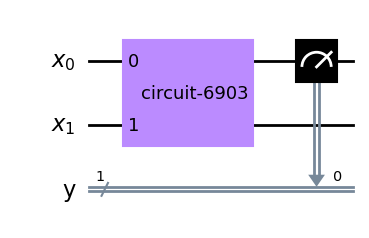

In [49]:
## To calculate P(a/0) we measure Alice's qubit on Z basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(1, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc = QuantumCircuit(q,c)
qc.append(bell_circuit,[q[0], q[1]])

##qc.append(U0,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc.measure(q[0], c[0])
qc.draw()



In [50]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel
from qiskit.providers.fake_provider import FakeVigo

# Build noise model from backend properties
backend = FakeVigo()
noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Perform a noise simulation
backend = AerSimulator(noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates)
transpiled_circuit = transpile(qc, backend)
# Specify the number of shots for each run of the circuit
num_shots =  N  # You can change this number based on your needs

# Perform multiple runs of the transpiled circuit with noise
simulator = AerSimulator(noise_model=noise_model, coupling_map=coupling_map, basis_gates=basis_gates)
job = execute(transpiled_circuit, simulator, shots=num_shots)

# Retrieve the results
result = job.result()
counts = result.get_counts(transpiled_circuit)

total_shots = sum(counts.values())  # Calculate the total number of shots
Pa0 = {}

# Calculate the probability for each outcome
for outcome, count in counts.items():
    probability = count / total_shots
    Pa0[outcome] = probability
Pa0

{'1': 0.497, '0': 0.503}

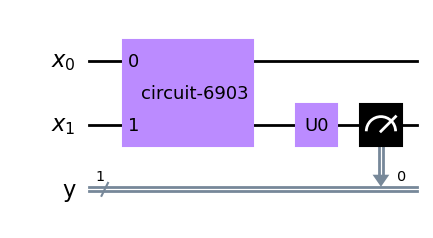

In [51]:
## To calculate P(b/0) we measure Bob's qubit on Z+X/sqrt(2) basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(1, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc = QuantumCircuit(q,c)
qc.append(bell_circuit,[q[0], q[1]])

qc.append(U0,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc.measure(1, 0)
qc.draw()

In [52]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel
from qiskit.providers.fake_provider import FakeVigo

# Build noise model from backend properties
backend = FakeVigo()
noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Perform a noise simulation
backend = AerSimulator(noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates)
transpiled_circuit = transpile(qc, backend)
# Specify the number of shots for each run of the circuit
num_shots =  N  # You can change this number based on your needs

# Perform multiple runs of the transpiled circuit with noise
simulator = AerSimulator(noise_model=noise_model, coupling_map=coupling_map, basis_gates=basis_gates)
job = execute(transpiled_circuit, simulator, shots=num_shots)

# Retrieve the results
result = job.result()
counts = result.get_counts(transpiled_circuit)

total_shots = sum(counts.values())  # Calculate the total number of shots

# Initialize a dictionary to store the probabilities
Pb0 = {}

# Calculate the probability for each outcome
for outcome, count in counts.items():
    probability = count / total_shots
    Pb0[outcome] = probability
Pb0

{'1': 0.49025, '0': 0.50975}

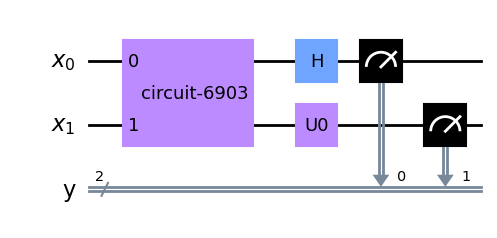

In [53]:
## To calculate P(ab/xy=10) we measure Alice's qubit on X basis and Bob's qubit on (X+Z)/sqrt(2) basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(2, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc = QuantumCircuit(q,c)
qc.append(bell_circuit,[q[0], q[1]])
qc.h(0)
qc.append(U0,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc.measure(q, c)
qc.draw()

In [54]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel
from qiskit.providers.fake_provider import FakeVigo

# Build noise model from backend properties
backend = FakeVigo()
noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Perform a noise simulation
backend = AerSimulator(noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates)
transpiled_circuit = transpile(qc, backend)
# Specify the number of shots for each run of the circuit
num_shots =  N  # You can change this number based on your needs

# Perform multiple runs of the transpiled circuit with noise
simulator = AerSimulator(noise_model=noise_model, coupling_map=coupling_map, basis_gates=basis_gates)
job = execute(transpiled_circuit, simulator, shots=num_shots)

# Retrieve the results
result = job.result()
counts = result.get_counts(transpiled_circuit)

total_shots = sum(counts.values())  # Calculate the total number of shots
# Initialize a dictionary to store the probabilities
P10 = {}

# Calculate the probability for each outcome
for outcome, count in counts.items():
    probability = count / total_shots
    P10[outcome] = probability
P10



{'01': 0.39125, '11': 0.106375, '00': 0.1205, '10': 0.381875}

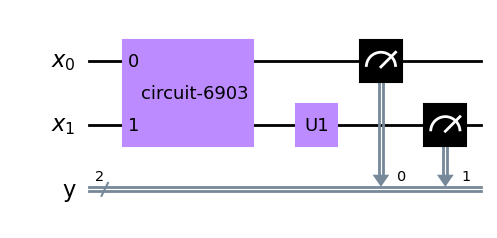

In [55]:
## To calculate P(ab/xy=01) we measure Alice's qubit on Z basis and Bob's qubit on (X-Z)/sqrt(2) basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(2, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc = QuantumCircuit(q,c)
qc.append(bell_circuit,[q[0], q[1]])

qc.append(U1,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc.measure(q, c)
qc.draw()

In [56]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel
from qiskit.providers.fake_provider import FakeVigo

# Build noise model from backend properties
backend = FakeVigo()
noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Perform a noise simulation
backend = AerSimulator(noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates)
transpiled_circuit = transpile(qc, backend)
# Specify the number of shots for each run of the circuit
num_shots =  N  # You can change this number based on your needs

# Perform multiple runs of the transpiled circuit with noise
simulator = AerSimulator(noise_model=noise_model, coupling_map=coupling_map, basis_gates=basis_gates)
job = execute(transpiled_circuit, simulator, shots=num_shots)

# Retrieve the results
result = job.result()
counts = result.get_counts(transpiled_circuit)

total_shots = sum(counts.values())  # Calculate the total number of shots
# Initialize a dictionary to store the probabilities
P01 = {}

# Calculate the probability for each outcome
for outcome, count in counts.items():
    probability = count / total_shots
    P01[outcome] = probability
P01



{'01': 0.113875, '10': 0.100625, '00': 0.405375, '11': 0.380125}

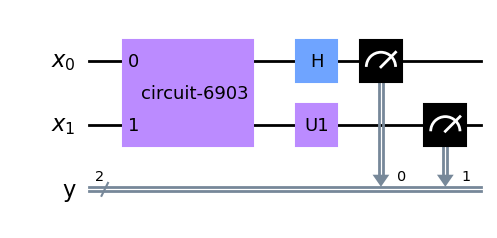

In [57]:
## To calculate P(ab/xy=11) we measure Alice's qubit on X basis and Bob's qubit on (X-Z)/sqrt(2) basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(2, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc = QuantumCircuit(q,c)
qc.append(bell_circuit,[q[0], q[1]])
qc.h(0)
qc.append(U1,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc.measure(q, c)
qc.draw()

In [58]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel
from qiskit.providers.fake_provider import FakeVigo

# Build noise model from backend properties
backend = FakeVigo()
noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Perform a noise simulation
backend = AerSimulator(noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates)
transpiled_circuit = transpile(qc, backend)
# Specify the number of shots for each run of the circuit
num_shots =  N  # You can change this number based on your needs

# Perform multiple runs of the transpiled circuit with noise
simulator = AerSimulator(noise_model=noise_model, coupling_map=coupling_map, basis_gates=basis_gates)
job = execute(transpiled_circuit, simulator, shots=num_shots)

# Retrieve the results
result = job.result()
counts = result.get_counts(transpiled_circuit)

total_shots = sum(counts.values())  # Calculate the total number of shots

# Initialize a dictionary to store the probabilities
P11 = {}

# Calculate the probability for each outcome
for outcome, count in counts.items():
    probability = count / total_shots
    P11[outcome] = probability
P11



{'11': 0.1025, '00': 0.11475, '10': 0.385625, '01': 0.397125}

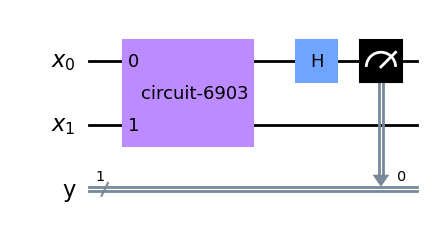

In [59]:
## ## To calculate P(a/1) we measure Alice's qubit on X basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(1, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc = QuantumCircuit(q,c)
qc.append(bell_circuit,[q[0], q[1]])
qc.h(0)
#qc.append(U1,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc.measure(q[0], c)
qc.draw()

In [60]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel
from qiskit.providers.fake_provider import FakeVigo

# Build noise model from backend properties
backend = FakeVigo()
noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Perform a noise simulation
backend = AerSimulator(noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates)
transpiled_circuit = transpile(qc, backend)
# Specify the number of shots for each run of the circuit
num_shots =  N  # You can change this number based on your needs

# Perform multiple runs of the transpiled circuit with noise
simulator = AerSimulator(noise_model=noise_model, coupling_map=coupling_map, basis_gates=basis_gates)
job = execute(transpiled_circuit, simulator, shots=num_shots)

# Retrieve the results
result = job.result()
counts = result.get_counts(transpiled_circuit)

total_shots = sum(counts.values())  # Calculate the total number of shots

# Initialize a dictionary to store the probabilities
Pa1 = {}

# Calculate the probability for each outcome
for outcome, count in counts.items():
    probability = count / total_shots
    Pa1[outcome] = probability
Pa1

{'0': 0.507, '1': 0.493}

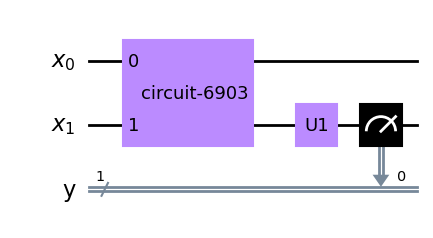

In [61]:
## ## To calculate P(b/1) we measure Bob's qubit on X-Z/sqrt(2) basis
q = QuantumRegister(2, name="x")

# Allocating 2 bits
c = ClassicalRegister(1, name="y")

# We build a quantum circuit with both registers.
# By default, everything is initialized to 0 and to |0>
qc = QuantumCircuit(q,c)
qc.append(bell_circuit,[q[0], q[1]])

qc.append(U1,[q[1]])
# Mesure of all of register q, storing results in c.
# This is still part of the circuit
qc.measure(q[1], c)
qc.draw()

In [62]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import NoiseModel
from qiskit.providers.fake_provider import FakeVigo

# Build noise model from backend properties
backend = FakeVigo()
noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Perform a noise simulation
backend = AerSimulator(noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates)
transpiled_circuit = transpile(qc, backend)
# Specify the number of shots for each run of the circuit
num_shots =  N  # You can change this number based on your needs

# Perform multiple runs of the transpiled circuit with noise
simulator = AerSimulator(noise_model=noise_model, coupling_map=coupling_map, basis_gates=basis_gates)
job = execute(transpiled_circuit, simulator, shots=num_shots)

# Retrieve the results
result = job.result()
counts = result.get_counts(transpiled_circuit)

total_shots = sum(counts.values())  # Calculate the total number of shots
# Initialize a dictionary to store the probabilities
Pb1 = {}

# Calculate the probability for each outcome
for outcome, count in counts.items():
    probability = count / total_shots
    Pb1[outcome] = probability
Pb1

{'1': 0.48425, '0': 0.51575}

In [63]:
##ep_ax = |P(a=1/xy)-P(a=1/xy')|
#ep_a0=[]
ep_a0.append(abs(P00['01']+P00['11'] - (P01['01']+P01['11']))) # |P(a=1/00) - P(a=1/01)|
#ep_a1=[]
ep_a1.append(abs(P10['01']+P10['11'] - (P11['01']+P11['11']))) # |P(a=1/10) - P(a=1/11)|

##ep_by = P(b=1/xy)-P(b=1/x'y)
#ep_b0=[]
ep_b0.append(abs(P00['10']+P00['11'] - (P10['10']+P10['11']))) # |P(b=1/00) - P(b=1/10)|
#ep_b1=[]
ep_b1.append(abs(P01['10']+P01['11'] - (P11['10']+P11['11']))) # |P(b=1/01) - P(b=1/11)|

print("ep_a0 = |P(a=1/00) - P(a=1/01)|:", ep_a0)
print("ep_a1 = |P(a=1/10) - P(a=1/11)|:", ep_a1)
print("ep_b0 = |P(b=1/00) - P(b=1/10)|:", ep_b0)
print("ep_b1 = |P(b=1/01) - P(b=1/11)|:", ep_b1)

ep_a0 = |P(a=1/00) - P(a=1/01)|: [0.01112499999999994, 0.0031249999999999334, 0.004249999999999976]
ep_a1 = |P(a=1/10) - P(a=1/11)|: [0.002874999999999961, 0.0022499999999999742, 0.0020000000000000018]
ep_b0 = |P(b=1/00) - P(b=1/10)|: [0.00862500000000005, 0.019124999999999948, 0.002375000000000016]
ep_b1 = |P(b=1/01) - P(b=1/11)|: [0.005249999999999977, 0.0011249999999999871, 0.007374999999999965]


In [64]:
##ep_noise statistical noise
#ep_a0_snoise=[]
#ep_a1_snoise=[]
#ep_b0_snoise=[]
#ep_b1_snoise=[]

ep_a0_snoise.append(abs(0.5 - Pa0['0']))
ep_a1_snoise.append(abs(0.5 - Pa1['0']))
ep_b0_snoise.append(abs(0.5 - Pb0['0'])) 
ep_b1_snoise.append(abs(0.5 - Pb1['0'])) 

print("ep_a0_snoise = |P(a=0/0) - 1/2|:", ep_a0_snoise)
print("ep_a1_snoise = |P(a=0/1) - 1/2|:", ep_a1_snoise)
print("ep_b0_snoise = |P(b=0/0) - 1/2|:", ep_b0_snoise)
print("ep_b1_snoise = |P(b=0/1) - 1/2|:", ep_b1_snoise)

ep_a0_snoise = |P(a=0/0) - 1/2|: [0.014124999999999999, 0.00824999999999998, 0.0030000000000000027]
ep_a1_snoise = |P(a=0/1) - 1/2|: [0.0006249999999999867, 0.009375000000000022, 0.007000000000000006]
ep_b0_snoise = |P(b=0/0) - 1/2|: [0.01737500000000003, 0.010499999999999954, 0.009750000000000036]
ep_b1_snoise = |P(b=0/1) - 1/2|: [0.017625000000000002, 0.015125000000000055, 0.015750000000000042]
